# Chapter 6 확률변수

In [2]:
%precision 3

'%.3f'

## 6-1. 이산확률변수

### [실습] 예제 6-1: 확률변수 X의 상태공간(Sx) 구하기
주사위 두 번 던지기. 확률변수 X = |i - j|, Sx = ?

In [3]:
X = list()
for i in range(1,7):
  for j in range(1, 7):
    X.append(abs(i-j))

Sx = set(X)
print(Sx)

{0, 1, 2, 3, 4, 5}


In [4]:
X = list()
for i in range(1, 7):
  for j in range(1, 7):
    X.append(abs(i-j))
Sx = set(X)
print(Sx)

{0, 1, 2, 3, 4, 5}


In [5]:
X = list()
for i in range(1,7):
  for j in range(1, 7):
    X.append(abs(i-j))

Sx = set(X)
Sx = list(Sx)
for i in range(len(Sx)):
  cnt = X.count(Sx[i])
  print(f'P(X={Sx[i]})={cnt}/{len(X)}')




P(X=0)=6/36
P(X=1)=10/36
P(X=2)=8/36
P(X=3)=6/36
P(X=4)=4/36
P(X=5)=2/36


In [6]:
X = list()
for i in range(1,7):
    for j in range(1, 7):
        X.append( abs(i-j)  )
Sx = set(X)
print(f'확률변수 X의 상태공간(Sx) = {Sx}')

확률변수 X의 상태공간(Sx) = {0, 1, 2, 3, 4, 5}


In [7]:
import random

N = 100
X = list()
for k in range(N):
    i = random.randint(1, 6)
    j = random.randint(1, 6)
    X.append( abs(i-j) )
#     print(f'시행횟수({k+1:>3}) - D1:{i}, D2:{j}, [i-j]:{abs(i-j)} ')
# print(X)
Sx = set(X)
print(f'확률변수 X의 상태공간(Sx) = {Sx}')


확률변수 X의 상태공간(Sx) = {0, 1, 2, 3, 4, 5}


### [확률변수 예] 붓꽃데이터 가져오기
-꽃잎(sepal), 꽃받침(petal)의 length, width, 붓꽃의 종류(species)가 모두 확률변수로 사용될 수 있다.

In [8]:
# 통계 시각화 라이브러리
!pip install seaborn

In [9]:
import seaborn as sns

iris = sns.load_dataset('iris')
print( type(iris) )
iris.head(3)

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### [실습] 예제6-3 확률질량함수로 확률구하기
주사위 두 번 던지기. 확률변수 X = |i - j|, Sx 원소에 대한 확률함수


##### 확률질량함수(PMF: probability mass function) 
이산확률변수의 확률분포를 나타내는 함수 <br><br>

- 1. 확률변수 X에 대한 상태공간 구하기

In [10]:
# 1. 확률변수 X에 대한 상태공간 구하기
X = list()   # 확률변수
D1 = [1,2,3,4,5,6]
D2 = [1,2,3,4,5,6]
for i in D1:
    for j in D2:
        X.append( abs(i-j)  )
print(f'상태공간(Sx): {X}')
Sx = set(X)
print(f'확률변수 X = {Sx}')


상태공간(Sx): [0, 1, 2, 3, 4, 5, 1, 0, 1, 2, 3, 4, 2, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 4, 3, 2, 1, 0, 1, 5, 4, 3, 2, 1, 0]
확률변수 X = {0, 1, 2, 3, 4, 5}


- 2. 확률변수에 대한 확률질량함수(fx) 만들기

In [11]:
# 소수점 자리수 표현
%precision 3

'%.3f'

In [12]:
import matplotlib.pyplot as plt
# 2. 확률변수에 대한 확률질량함수(fx) 만들기
def f(x):
    cnt = 0
    for i in D1:
        for j in D2:
            if abs(i-j) == x:
                cnt += 1
            
    return cnt / (len(D1)*len(D2))

prob = [ f(x) for x in Sx ]

# 3. 분포함수
def F(x):
    return sum([f(u) for u in X if u<=x])

s_prob = [ F(x) for x in Sx ]
print(s_prob)
print(f'확률질량함수: {dict(zip(X, prob))} ')
print(f'확률분포함수: {dict(zip(X, s_prob))}')

# plt.bar(list(Sx), prob, zorder=2) #질량함수
# plt.bar(list(Sx), s_prob, zorder=1) #분포함수
# plt.show()


[0.9999999999999999, 3.777777777777777, 5.555555555555555, 6.555555555555556, 7.000000000000001, 7.111111111111112]
확률질량함수: {0: 0.16666666666666666, 1: 0.2777777777777778, 2: 0.2222222222222222, 3: 0.16666666666666666, 4: 0.1111111111111111, 5: 0.05555555555555555} 
확률분포함수: {0: 0.9999999999999999, 1: 3.777777777777777, 2: 5.555555555555555, 3: 6.555555555555556, 4: 7.000000000000001, 5: 7.111111111111112}


- **확률 전체의 합은 1**

In [13]:
sum(probs)

NameError: name 'probs' is not defined

### [실습] 확률질량함수와 확률 구하기
동전 네번던지기, 앞면이 나온 횟수: X


In [ ]:
import itertools

coin = {'H', 'T'}
r = 4

#상태공간(Sx)
coins = list(itertools.product(coin, repeat=r)) 
coins = [ "".join(i) for i in coins]
print(f'동전 {r}번 던지는 상태공간(Sx): {coins}')

#확률변수 x
S = [x.count("H") for x in coins]
X = list(set(S))
print(f'확률변수(X): {X}')

#확률질량함수 f(x)
def f(x):
  return S.count(x) / len(coins)

#확률
prob = [ f(x) for x in X]
print(f'확률변수 X의 확률: {dict(zip(X, prob))}')

#확률구하기
print(f'(b)앞면의 횟수가 2일 확률: {f(2)}')
print(f'(c)앞면의 횟수가 2 이상일 확률: {sum([ f(x) for x in range(2, len(X)) ])}')
print(f'(c)앞면의 횟수가 3 이하일 확률: {sum([ f(x) for x in range(3, -1, -1) ])}')


동전 4번 던지는 상태공간(Sx): ['TTTT', 'TTTH', 'TTHT', 'TTHH', 'THTT', 'THTH', 'THHT', 'THHH', 'HTTT', 'HTTH', 'HTHT', 'HTHH', 'HHTT', 'HHTH', 'HHHT', 'HHHH']
확률변수(X): [0, 1, 2, 3, 4]
확률변수 X의 확률: {0: 0.0625, 1: 0.25, 2: 0.375, 3: 0.25, 4: 0.0625}
(b)앞면의 횟수가 2일 확률: 0.375
(c)앞면의 횟수가 2 이상일 확률: 0.6875
(c)앞면의 횟수가 3 이하일 확률: 0.9375


###[실습] 예제 6-4

In [ ]:
Sx = list()
for i in range(1, 7):
  for j in range(1, 7):
    Sx.append(abs(i-j))
X = set(Sx)
print(f'확률변수 X: {X}')
print(f'상태공간 Sx:{Sx}')

def f(x):
  cnt = 0
  for i in range(1, 7):
    for j in range(1, 7):
      if(abs(i-j) == x):
        cnt +=1
  return cnt/36

prob = [f(x) for x in X]

# 3. 분포함수
def F(x):
    return sum([f(u) for u in X if u<=x])

s_prob = [ F(x) for x in Sx ]

print(f'확률질량함수: {dict(zip(X, prob))}')
print(f'확률분포함수: {dict(zip(X, s_prob))}')








확률변수 X: {0, 1, 2, 3, 4, 5}
상태공간 Sx:[0, 1, 2, 3, 4, 5, 1, 0, 1, 2, 3, 4, 2, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 4, 3, 2, 1, 0, 1, 5, 4, 3, 2, 1, 0]
확률질량함수: {0: 0.16666666666666666, 1: 0.2777777777777778, 2: 0.2222222222222222, 3: 0.16666666666666666, 4: 0.1111111111111111, 5: 0.05555555555555555}
확률분포함수: {0: 0.16666666666666666, 1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8333333333333333, 4: 0.9444444444444444, 5: 1.0}


- 확률변수 X의 상태 값과 확률 함께 표시

In [ ]:
dict(zip(Sx, probs))

{0: 0.167, 1: 0.278, 2: 0.222, 3: 0.167, 4: 0.111, 5: 0.056}

- 3.확률변수 X와 확률의 관계를 그래프로 나타내기

[0, 1, 2, 3, 4, 5] [0.16666666666666666, 0.2777777777777778, 0.2222222222222222, 0.16666666666666666, 0.1111111111111111, 0.05555555555555555]


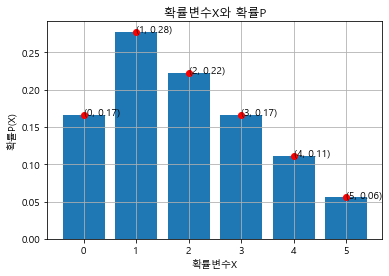

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

X = list(Sx)
Y = probs
print(f'확률변수(X) : {X}')
print(f'확률(Y) : {Y}')

plt.bar(X, Y, zorder=1)
plt.scatter(X, Y, c='r', zorder=2)
for x, y in zip(X, Y):
    plt.text(x, y, (x, round(y,2)), fontsize=10)

plt.grid()
plt.title('확률변수X와 확률P')
plt.xlabel('확률변수X')
plt.ylabel('확률P(X)')
plt.show()

### 6-2 연속확률변수 (Continuous Random Variable)

### [실습] 예제 6-7 : 연속확률변수의 확률밀도함수 구하기

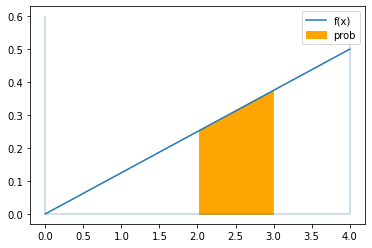

In [ ]:
import numpy as np
# 1. 연속확률변수 구간
X_range = [0, 4]

# 2. 확률밀도함수(fx)
def f(x):
  if X_range[0] <= x <= X_range[1]:
    return (1/8*x)
  else:
    return 0

#그래프로 그리기
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [ f(x) for x in X ]

plt.plot(X, Y, label='f(x)')
plt.fill_between(X, Y, where=(X>2)&(X<=3), color='orange', label='prob')
plt.legend()

plt.hlines(0,0,4,alpha=0.3)
plt.vlines(0,0,0.6,alpha=0.3)
plt.vlines(X.max(),0,0.6,alpha=0.3)
plt.show()



### [실습] 초등학생의 키

In [ ]:
S, MEAN, STD = 100000, 140, 5
data = MEAN + np.random.randn(S) * STD

print(data.mean())
print(data.std())


140.00434117061334
5.006339706371125
